# 판다스

1. 설치해야 하는 라이브러리
2. 자료구조 : 시리즈, 데이터프레임

In [2]:
import pandas as pd

# 1. 데이터 읽기

In [4]:
df = pd.read_csv('./data/gapminder.tsv', sep='\t')
type(df)

pandas.core.frame.DataFrame

In [5]:
df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [13]:
df.head() #위의 5건 출력 - default : subset

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


## 1.1 데이터프레임 이해하기

In [10]:
df.shape # (row, col) / (건수, 항목수)

(1704, 6)

In [14]:
df.columns #열을 식별하는 idex, list로 

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

In [15]:
df.dtypes

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object

EDA 탐색적 데이터 분석 - shape, columns, dtypes

null : 값이 없는 것
dtype object : str

In [17]:
df.info()  #객체.의 정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


## 1.2 데이터 추출 - subset

### 열 추출

In [18]:
df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [19]:
df['country']

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
1699       Zimbabwe
1700       Zimbabwe
1701       Zimbabwe
1702       Zimbabwe
1703       Zimbabwe
Name: country, Length: 1704, dtype: object

In [32]:
type(df['country'])  #시리즈객체

pandas.core.series.Series

In [21]:
df1 = df['country']
df1.head()

0    Afghanistan
1    Afghanistan
2    Afghanistan
3    Afghanistan
4    Afghanistan
Name: country, dtype: object

In [31]:
df[ ['country', 'continent'] ]   # [속성목록]을 이용해서 데이터프레임 추출

,country,continent
0,Afghanistan,Asia
1,Afghanistan,Asia
2,Afghanistan,Asia
3,Afghanistan,Asia
4,Afghanistan,Asia
...,...,...
1699,Zimbabwe,Africa
1700,Zimbabwe,Africa
1701,Zimbabwe,Africa
1702,Zimbabwe,Africa


In [25]:
#보고싶은 컬럼 4개를 추출한 서브셋 생성
df2 = df[ ['country', 'year', 'lifeExp', 'pop'] ]
df2.head()

,country,year,lifeExp,pop
0,Afghanistan,1952,28.801,8425333
1,Afghanistan,1957,30.332,9240934
2,Afghanistan,1962,31.997,10267083
3,Afghanistan,1967,34.020,11537966
4,Afghanistan,1972,36.088,13079460


In [26]:
type(df1), type(df2)

(pandas.core.series.Series, pandas.core.frame.DataFrame)

### 행 추출 

1. loc [행 이름] / default rangeindex > number / 인덱스의 이름을 변경 > 이름으로 추출
3. iloc [행 번호]

In [27]:
df.loc[ 0 ] 

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap     779.445314
Name: 0, dtype: object

In [30]:
#100번째 행 추출
df.loc[99]

country      Bangladesh
continent          Asia
year               1967
lifeExp          43.453
pop            62821884
gdpPercap    721.186086
Name: 99, dtype: object

In [34]:
# - index : 지원하지 않은
    # df.loc[-1]

df.shape[0]  #raw 수 # 1704개

df.loc[ df.shape[0] -1 ]  #전체 raw에서 -1 > 1703번째

country        Zimbabwe
continent        Africa
year               2007
lifeExp          43.487
pop            12311143
gdpPercap    469.709298
Name: 1703, dtype: object

In [35]:
#여러 행 추출 > [] 로 지정
df.loc[ [0,1,4] ]

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [36]:
#현재 데이터프레임에서는 loc[] iloc[] 동일
df.iloc[ [0,1,4] ]

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [6]:
# 행, 열을 같이 지정해서 추출 ','로 구분
# loc[], iloc[]의 차이는 컬럼을 꺼내는 방식

df.loc[ [0], ['country'] ] 

,country
0,Afghanistan


In [41]:
df.iloc[ [0], [0] ] 

,country
0,Afghanistan


In [43]:
# slicing > : (colon)
df.loc[ : , ['country'] ]

,country
0,Afghanistan
1,Afghanistan
2,Afghanistan
3,Afghanistan
4,Afghanistan
...,...
1699,Zimbabwe
1700,Zimbabwe
1701,Zimbabwe
1702,Zimbabwe


In [97]:
df.loc[ :10 , ['country'] ]

,country
0,Afghanistan
1,Afghanistan
2,Afghanistan
3,Afghanistan
4,Afghanistan
5,Afghanistan
6,Afghanistan
7,Afghanistan
8,Afghanistan
9,Afghanistan


In [96]:
df.iloc[ :11 , [0] ]

,country
0,Afghanistan
1,Afghanistan
2,Afghanistan
3,Afghanistan
4,Afghanistan
5,Afghanistan
6,Afghanistan
7,Afghanistan
8,Afghanistan
9,Afghanistan


### range()

In [51]:
r_list = list( range(1,5) )
df.iloc[ :, r_list]

,continent,year,lifeExp,pop
0,Asia,1952,28.801,8425333
1,Asia,1957,30.332,9240934
2,Asia,1962,31.997,10267083
3,Asia,1967,34.020,11537966
4,Asia,1972,36.088,13079460
...,...,...,...,...
1699,Africa,1987,62.351,9216418
1700,Africa,1992,60.377,10704340
1701,Africa,1997,46.809,11404948
1702,Africa,2002,39.989,11926563


In [52]:
l_list = list(range(1,5,2))  #step 사용
df.iloc[ :, l_list]

,continent,lifeExp
0,Asia,28.801
1,Asia,30.332
2,Asia,31.997
3,Asia,34.020
4,Asia,36.088
...,...,...
1699,Africa,62.351
1700,Africa,60.377
1701,Africa,46.809
1702,Africa,39.989


In [53]:
# :을 이용한 slicing 구문
df.iloc[ :, 0:6:2] #전체행, 시작:끝:스텝

,country,year,pop
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460
...,...,...,...
1699,Zimbabwe,1987,9216418
1700,Zimbabwe,1992,10704340
1701,Zimbabwe,1997,11404948
1702,Zimbabwe,2002,11926563


In [98]:
df.iloc[ :11, [-1] ]  # list에서는 -1 허용 되기에

,gdpPercap
0,779.445314
1,820.853030
2,853.100710
3,836.197138
4,739.981106
5,786.113360
6,978.011439
7,852.395945
8,649.341395
9,635.341351


## 1.3 기초 통계 계산
 - descriptive - numeric data

In [66]:
#전체 데이터의 요약
df.describe()

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165876
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846988
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


In [69]:
#그룹화 > df 분할 > 통계
# ex, 연도별 기대수명 평균 / 대륙별 국가 갯수

df.groupby('year')
df.groupby('year')['lifeExp']  # [보고싶은 컬럼]
df.groupby('year')['lifeExp'].mean()  #.적용할 함수()

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [81]:
#대륙별 인구의 최대값
df.groupby('continent')['pop'].max().sort_index(ascending=False)
                                    #sort_index() : 정렬
                                    #sort_index(ascending=False) : index 기준 역순

continent
Oceania       20434176
Europe        82400996
Asia        1318683096
Americas     301139947
Africa       135031164
Name: pop, dtype: int64

In [87]:
#최대값 기준 정렬
df.groupby('continent')['pop'].max().sort_values(ascending=False)

continent
Asia        1318683096
Americas     301139947
Africa       135031164
Europe        82400996
Oceania       20434176
Name: pop, dtype: int64

In [101]:
#빈도수 계산 : nunique() 
#중복 제거
df.groupby('continent')['country'].nunique()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

In [99]:
#value_counts()
df.groupby('continent')['country'].value_counts()

continent  country       
Africa     Algeria           12
           Angola            12
           Benin             12
           Botswana          12
           Burkina Faso      12
                             ..
Europe     Switzerland       12
           Turkey            12
           United Kingdom    12
Oceania    Australia         12
           New Zealand       12
Name: count, Length: 142, dtype: int64

### 그래프로 그리기

In [93]:
year_lifeExp_mean = df.groupby('year')['lifeExp'].mean()
year_lifeExp_mean

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

<Axes: xlabel='year'>

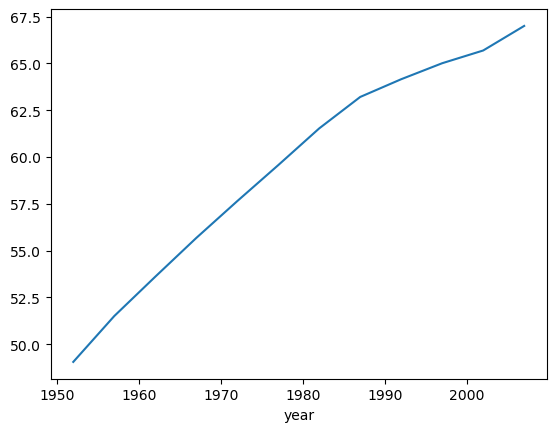

In [95]:
year_lifeExp_mean.plot()

#year(index) : x축
#값 : y축

# 2. 데이터 다루기

## 2.1 시리즈 만들기
 - 1차원 자료 : 리스트 유사, 넘파이의 어레이를 기본으로 만들어짐
 - 한 열의 데이터는 모두 동일한 타입

In [37]:
import pandas as pd

In [14]:
# 시리즈 생성 > 리스트 형식으로
# RangeIndex 생성됨

s = pd.Series( ['banana', 10] )
s, type(s)

(0    banana
 1        10
 dtype: object,
 pandas.core.series.Series)

In [13]:
# RangeIndex 변경 가능

s1 = pd.Series( data=['홍길동', '김길동'], index=['a', 'b'])
s1

a    홍길동
b    김길동
dtype: object

In [15]:
s1.head()

a    홍길동
b    김길동
dtype: object

In [16]:
s1.info()

<class 'pandas.core.series.Series'>
Index: 2 entries, a to b
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
2 non-null      object
dtypes: object(1)
memory usage: 140.0+ bytes


In [17]:
s1.loc['a']

'홍길동'

In [18]:
s1.iloc[0]

'홍길동'

## 2.2 데이터프레임 만들기

In [20]:
scientists = pd.DataFrame({
        "Name": ["Rosaline Franklin", "William Gosset"],
        "Occupation": ["Chemist", "Statistician"],
        "Born": ["1920-07-25", "1876-06-13"],
        "Died": ["1958-04-16", "1937-10-16"],
        "Age": [37, 61],
})

In [21]:
scientists.columns

Index(['Name', 'Occupation', 'Born', 'Died', 'Age'], dtype='object')

In [22]:
scientists

,Name,Occupation,Born,Died,Age
0,Rosaline Franklin,Chemist,1920-07-25,1958-04-16,37
1,William Gosset,Statistician,1876-06-13,1937-10-16,61


In [35]:
# name column 을 인덱스로 지정해서 데이터 프레임 생성하기

scientists.index = ["Rosaline Franklin", "William Gosset"]
scientists

,Name,Occupation,Born,Died,Age
Rosaline Franklin,Rosaline Franklin,Chemist,1920-07-25,1958-04-16,37
William Gosset,William Gosset,Statistician,1876-06-13,1937-10-16,61


In [39]:
f_row = scientists.loc["Rosaline Franklin"] 
f_row.values

array(['Rosaline Franklin', 'Chemist', '1920-07-25', '1958-04-16', 37],
      dtype=object)

In [28]:
f_row.index

Index(['Name', 'Occupation', 'Born', 'Died', 'Age'], dtype='object')

In [29]:
f_row.keys()

Index(['Name', 'Occupation', 'Born', 'Died', 'Age'], dtype='object')

In [40]:
scientists.loc[:,'Age']

Rosaline Franklin    37
William Gosset       61
Name: Age, dtype: int64

In [42]:
# series - enarray속성 가지고 있으므로, 함수 사용 가능
age = scientists['Age']
age.mean(), age.max(), age.min()

(49.0, 61, 37)

In [53]:
# series data 추출

scient2 = pd.read_csv('./data/scientists.csv')
scient2

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist
5,John Snow,1813-03-15,1858-06-16,45,Physician
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


In [48]:
ages = scient2['Age']
ages, type(ages)

(0    37
 1    61
 2    90
 3    66
 4    56
 5    45
 6    41
 7    77
 Name: Age, dtype: int64,
 pandas.core.series.Series)

In [50]:
# 기술통계량 확인, ages.mean()
ages.describe()

count     8.000000
mean     59.125000
std      18.325918
min      37.000000
25%      44.000000
50%      58.500000
75%      68.750000
max      90.000000
Name: Age, dtype: float64

In [52]:
# 조건값으로 추출
ages[ ages > ages.mean() ]   # 백터화, 불리언값 리스트

1    61
2    90
3    66
7    77
Name: Age, dtype: int64

In [59]:
# element wise - vector + vector : rank1 array
ages + ages, ages * ages

(0     74
 1    122
 2    180
 3    132
 4    112
 5     90
 6     82
 7    154
 Name: Age, dtype: int64,
 0    1369
 1    3721
 2    8100
 3    4356
 4    3136
 5    2025
 6    1681
 7    5929
 Name: Age, dtype: int64)

In [58]:
# vector + scalar > broadcasting
ages + 10

0     47
1     71
2    100
3     76
4     66
5     55
6     51
7     87
Name: Age, dtype: int64

In [60]:
s1 = pd.Series( [1,100] )
s1

0      1
1    100
dtype: int64

In [61]:
# vector 차원은 동일, 길이 다를 시 > numpy broadcasting과 차이
# 반드시 vector 길이가 같아야 함
s1 + ages

0     38.0
1    161.0
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
dtype: float64

## 2.3 인덱스

In [63]:
# default 는 index 기준 정렬
ages

0    37
1    61
2    90
3    66
4    56
5    45
6    41
7    77
Name: Age, dtype: int64

In [65]:
# 역순 정렬
rev_ages = ages.sort_index(ascending=False)
rev_ages

7    77
6    41
5    45
4    56
3    66
2    90
1    61
0    37
Name: Age, dtype: int64

In [66]:
ages*2

0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64

In [67]:
# index 정렬이 다른 경우, 같은 인덱스 기준으로 정렬 후 연산 수행 > 기존 정렬 방식
ages + rev_ages

0     74
1    122
2    180
3    132
4    112
5     90
6     82
7    154
Name: Age, dtype: int64

In [91]:
first_half = scient2[:4]
second_half = scient2[4:]
pd.concat( [first_half, second_half] )

,Name,Born,Died,Age,Occupation,born_dt,died_dt,age_days
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,37.0
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,61.0
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12,1910-08-13,90.0
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04,66.0
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14,56.0
5,John Snow,1813-03-15,1858-06-16,45,Physician,1813-03-15,1858-06-16,45.0
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,1912-06-23,1954-06-07,41.0
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,1777-04-30,1855-02-23,77.0


In [70]:
# 데이터프레임에 스칼라 연산 - column type 따라 연산
scient2*2

,Name,Born,Died,Age,Occupation
0,Rosaline FranklinRosaline Franklin,1920-07-251920-07-25,1958-04-161958-04-16,74,ChemistChemist
1,William GossetWilliam Gosset,1876-06-131876-06-13,1937-10-161937-10-16,122,StatisticianStatistician
2,Florence NightingaleFlorence Nightingale,1820-05-121820-05-12,1910-08-131910-08-13,180,NurseNurse
3,Marie CurieMarie Curie,1867-11-071867-11-07,1934-07-041934-07-04,132,ChemistChemist
4,Rachel CarsonRachel Carson,1907-05-271907-05-27,1964-04-141964-04-14,112,BiologistBiologist
5,John SnowJohn Snow,1813-03-151813-03-15,1858-06-161858-06-16,90,PhysicianPhysician
6,Alan TuringAlan Turing,1912-06-231912-06-23,1954-06-071954-06-07,82,Computer ScientistComputer Scientist
7,Johann GaussJohann Gauss,1777-04-301777-04-30,1855-02-231855-02-23,154,MathematicianMathematician


In [71]:
# 숫자로 구성한 데이터프레임의 더하기 연산 +, add()
# df1, df2에 동일 값 할당 후 더하기 
df1 = df2 = pd.DataFrame(
                data = [ [1,2,3],[4,5,6] ]
            )
df1.add(df2)

,0,1,2
0,2,4,6
1,8,10,12


## 2.4 열 추가

In [73]:
scient2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        8 non-null      object
 1   Born        8 non-null      object
 2   Died        8 non-null      object
 3   Age         8 non-null      int64 
 4   Occupation  8 non-null      object
dtypes: int64(1), object(4)
memory usage: 452.0+ bytes


In [74]:
# str(object) > datetime
# tp_datetime( vector, 정렬방식)
born_datetime = pd.to_datetime( scient2['Born'], format='%Y-%m-%d' )
born_datetime

0   1920-07-25
1   1876-06-13
2   1820-05-12
3   1867-11-07
4   1907-05-27
5   1813-03-15
6   1912-06-23
7   1777-04-30
Name: Born, dtype: datetime64[ns]

In [104]:
# 기존 data에 datetime 방식 넣어주기
scient2['born_dt'] = born_datetime
scient2.head(3)

,Name,Born,Died,Age,Occupation,born_dt,died_dt,age_days
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,37.0
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,61.0
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12,1910-08-13,90.0


In [105]:
scient2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Name        8 non-null      object        
 1   Born        8 non-null      object        
 2   Died        8 non-null      object        
 3   Age         8 non-null      int64         
 4   Occupation  8 non-null      object        
 5   born_dt     8 non-null      datetime64[ns]
 6   died_dt     8 non-null      datetime64[ns]
 7   age_days    8 non-null      float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 644.0+ bytes


In [106]:
died_datetime = pd.to_datetime( scient2['Died'], format='%Y-%m-%d' )
scient2['died_dt'] = died_datetime

In [107]:
scient2['age_days'] = scient2['died_dt'] - scient2['born_dt']
scient2['age_days'].dt.days

0    13779
1    22404
2    32964
3    24345
4    20777
5    16529
6    15324
7    28422
Name: age_days, dtype: int64

In [108]:
scient2['age_days'].dt.days / 365

0    37.750685
1    61.380822
2    90.312329
3    66.698630
4    56.923288
5    45.284932
6    41.983562
7    77.868493
Name: age_days, dtype: float64

In [109]:
# series 객체 > ()참조를 통해.apply(함수)
import numpy as np

scient2['age_days'] = (scient2['age_days'].dt.days / 365).apply(np.floor)
scient2

,Name,Born,Died,Age,Occupation,born_dt,died_dt,age_days
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,37.0
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,61.0
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12,1910-08-13,90.0
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04,66.0
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14,56.0
5,John Snow,1813-03-15,1858-06-16,45,Physician,1813-03-15,1858-06-16,45.0
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,1912-06-23,1954-06-07,41.0
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,1777-04-30,1855-02-23,77.0


In [115]:
# df.assign( col_name = 수식 ), col_name은 새로 만들어짐.
# 내가 가지고 있는 데이터(scient2)에 할당값을 넣어줘
# return 후 원본에 할당

scient2 = scient2.assign(
    age_days_assign = scient2['died_dt'] - scient2['born_dt'],
    age_assign = ((scient2['died_dt'] - scient2['born_dt']).dt.days / 365).apply(np.floor)
)
scient2

,Name,Born,Died,Age,Occupation,born_dt,died_dt,age_days,age_days_assign,age_assign
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,37.0,13779 days,37.0
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,61.0,22404 days,61.0
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12,1910-08-13,90.0,32964 days,90.0
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04,66.0,24345 days,66.0
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14,56.0,20777 days,56.0
5,John Snow,1813-03-15,1858-06-16,45,Physician,1813-03-15,1858-06-16,45.0,16529 days,45.0
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,1912-06-23,1954-06-07,41.0,15324 days,41.0
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,1777-04-30,1855-02-23,77.0,28422 days,77.0


## 2.5 열 삭제

In [116]:
# default 가 행이기 때문에, 축 값 삭제시 지정
# .drop - copy (원본은 삭제되지 않음) > return 만

scient3_d = scient2.drop( ['Age'], axis='columns' )
scient3_d

,Name,Born,Died,Occupation,born_dt,died_dt,age_days,age_days_assign,age_assign
0,Rosaline Franklin,1920-07-25,1958-04-16,Chemist,1920-07-25,1958-04-16,37.0,13779 days,37.0
1,William Gosset,1876-06-13,1937-10-16,Statistician,1876-06-13,1937-10-16,61.0,22404 days,61.0
2,Florence Nightingale,1820-05-12,1910-08-13,Nurse,1820-05-12,1910-08-13,90.0,32964 days,90.0
3,Marie Curie,1867-11-07,1934-07-04,Chemist,1867-11-07,1934-07-04,66.0,24345 days,66.0
4,Rachel Carson,1907-05-27,1964-04-14,Biologist,1907-05-27,1964-04-14,56.0,20777 days,56.0
5,John Snow,1813-03-15,1858-06-16,Physician,1813-03-15,1858-06-16,45.0,16529 days,45.0
6,Alan Turing,1912-06-23,1954-06-07,Computer Scientist,1912-06-23,1954-06-07,41.0,15324 days,41.0
7,Johann Gauss,1777-04-30,1855-02-23,Mathematician,1777-04-30,1855-02-23,77.0,28422 days,77.0


In [ ]:
# inplace=True : drop 후 원본에 엎는다
scient2.drop( ['Age'], axis='columns', inplace=True )

## 2.6 파일 저장
  - 피클로 저장(객체화)
  - 파이썬의 데이터파일 형식 : 바이너리 저장/읽기 , .pickle/ .pkl/ .p
  - 시리즈, 데이터프레임 저장
  - csv, tsv, excel 지원
  - to_csv(), read_csv()
  - excel > openpyxl 설치 필요
  - pip install openpyxl

In [119]:
# series 객체 저장 > to_pickle(저장경로/파일이름)
scient2['Name'].to_pickle('./data/scientist_names_series.pickle')

In [124]:
#피클 파일에서 읽어오기
series_pkl = pd.read_pickle('./data/scientist_names_series.pickle')
series_pkl

0       Rosaline Franklin
1          William Gosset
2    Florence Nightingale
3             Marie Curie
4           Rachel Carson
5               John Snow
6             Alan Turing
7            Johann Gauss
Name: Name, dtype: object

In [125]:
#데이터프레임을 저장, 다시 읽어오기
scient2.to_pickle('./data/scientist_df.pickle')

In [126]:
pd.read_pickle('./data/scientist_df.pickle')

,Name,Born,Died,Age,Occupation,born_dt,died_dt,age_days,age_days_assign,age_assign
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,37.0,13779 days,37.0
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,61.0,22404 days,61.0
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12,1910-08-13,90.0,32964 days,90.0
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04,66.0,24345 days,66.0
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14,56.0,20777 days,56.0
5,John Snow,1813-03-15,1858-06-16,45,Physician,1813-03-15,1858-06-16,45.0,16529 days,45.0
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,1912-06-23,1954-06-07,41.0,15324 days,41.0
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,1777-04-30,1855-02-23,77.0,28422 days,77.0


In [127]:
#csv로 저장
scient2.to_csv('./data/scientist_df.csv')

In [129]:
scient2_csv_df = pd.read_csv('./data/scientist_df.csv')
type(scient2_csv_df)

pandas.core.frame.DataFrame

In [130]:
scient2.head(2)

,Name,Born,Died,Age,Occupation,born_dt,died_dt,age_days,age_days_assign,age_assign
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,37.0,13779 days,37.0
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,61.0,22404 days,61.0


In [131]:
# dictionary
sci_dict = scient2.to_dict()
sci_dict

{'Name': {0: 'Rosaline Franklin',
  1: 'William Gosset',
  2: 'Florence Nightingale',
  3: 'Marie Curie',
  4: 'Rachel Carson',
  5: 'John Snow',
  6: 'Alan Turing',
  7: 'Johann Gauss'},
 'Born': {0: '1920-07-25',
  1: '1876-06-13',
  2: '1820-05-12',
  3: '1867-11-07',
  4: '1907-05-27',
  5: '1813-03-15',
  6: '1912-06-23',
  7: '1777-04-30'},
 'Died': {0: '1958-04-16',
  1: '1937-10-16',
  2: '1910-08-13',
  3: '1934-07-04',
  4: '1964-04-14',
  5: '1858-06-16',
  6: '1954-06-07',
  7: '1855-02-23'},
 'Age': {0: 37, 1: 61, 2: 90, 3: 66, 4: 56, 5: 45, 6: 41, 7: 77},
 'Occupation': {0: 'Chemist',
  1: 'Statistician',
  2: 'Nurse',
  3: 'Chemist',
  4: 'Biologist',
  5: 'Physician',
  6: 'Computer Scientist',
  7: 'Mathematician'},
 'born_dt': {0: Timestamp('1920-07-25 00:00:00'),
  1: Timestamp('1876-06-13 00:00:00'),
  2: Timestamp('1820-05-12 00:00:00'),
  3: Timestamp('1867-11-07 00:00:00'),
  4: Timestamp('1907-05-27 00:00:00'),
  5: Timestamp('1813-03-15 00:00:00'),
  6: Timesta

In [132]:
# dict -> dataframe 변환
sci_dict_df = pd.DataFrame.from_dict(sci_dict)
sci_dict_df

,Name,Born,Died,Age,Occupation,born_dt,died_dt,age_days,age_days_assign,age_assign
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist,1920-07-25,1958-04-16,37.0,13779 days,37.0
1,William Gosset,1876-06-13,1937-10-16,61,Statistician,1876-06-13,1937-10-16,61.0,22404 days,61.0
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse,1820-05-12,1910-08-13,90.0,32964 days,90.0
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist,1867-11-07,1934-07-04,66.0,24345 days,66.0
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist,1907-05-27,1964-04-14,56.0,20777 days,56.0
5,John Snow,1813-03-15,1858-06-16,45,Physician,1813-03-15,1858-06-16,45.0,16529 days,45.0
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist,1912-06-23,1954-06-07,41.0,15324 days,41.0
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician,1777-04-30,1855-02-23,77.0,28422 days,77.0


In [137]:
# dataframe -> json(외부) 변환
sci_json = scient2.to_json(orient='records', indent=2, date_format='iso')  #(조건사항추가)
sci_json

'[\n  {\n    "Name":"Rosaline Franklin",\n    "Born":"1920-07-25",\n    "Died":"1958-04-16",\n    "Age":37,\n    "Occupation":"Chemist",\n    "born_dt":"1920-07-25T00:00:00.000",\n    "died_dt":"1958-04-16T00:00:00.000",\n    "age_days":37.0,\n    "age_days_assign":"P13779DT0H0M0S",\n    "age_assign":37.0\n  },\n  {\n    "Name":"William Gosset",\n    "Born":"1876-06-13",\n    "Died":"1937-10-16",\n    "Age":61,\n    "Occupation":"Statistician",\n    "born_dt":"1876-06-13T00:00:00.000",\n    "died_dt":"1937-10-16T00:00:00.000",\n    "age_days":61.0,\n    "age_days_assign":"P22404DT0H0M0S",\n    "age_assign":61.0\n  },\n  {\n    "Name":"Florence Nightingale",\n    "Born":"1820-05-12",\n    "Died":"1910-08-13",\n    "Age":90,\n    "Occupation":"Nurse",\n    "born_dt":"1820-05-12T00:00:00.000",\n    "died_dt":"1910-08-13T00:00:00.000",\n    "age_days":90.0,\n    "age_days_assign":"P32964DT0H0M0S",\n    "age_assign":90.0\n  },\n  {\n    "Name":"Marie Curie",\n    "Born":"1867-11-07",\n    "

In [138]:
# pprint : raw 형식의 데이터출력 형식 지정
import pprint
pprint.pprint(sci_json)

('[\n'
 '  {\n'
 '    "Name":"Rosaline Franklin",\n'
 '    "Born":"1920-07-25",\n'
 '    "Died":"1958-04-16",\n'
 '    "Age":37,\n'
 '    "Occupation":"Chemist",\n'
 '    "born_dt":"1920-07-25T00:00:00.000",\n'
 '    "died_dt":"1958-04-16T00:00:00.000",\n'
 '    "age_days":37.0,\n'
 '    "age_days_assign":"P13779DT0H0M0S",\n'
 '    "age_assign":37.0\n'
 '  },\n'
 '  {\n'
 '    "Name":"William Gosset",\n'
 '    "Born":"1876-06-13",\n'
 '    "Died":"1937-10-16",\n'
 '    "Age":61,\n'
 '    "Occupation":"Statistician",\n'
 '    "born_dt":"1876-06-13T00:00:00.000",\n'
 '    "died_dt":"1937-10-16T00:00:00.000",\n'
 '    "age_days":61.0,\n'
 '    "age_days_assign":"P22404DT0H0M0S",\n'
 '    "age_assign":61.0\n'
 '  },\n'
 '  {\n'
 '    "Name":"Florence Nightingale",\n'
 '    "Born":"1820-05-12",\n'
 '    "Died":"1910-08-13",\n'
 '    "Age":90,\n'
 '    "Occupation":"Nurse",\n'
 '    "born_dt":"1820-05-12T00:00:00.000",\n'
 '    "died_dt":"1910-08-13T00:00:00.000",\n'
 '    "age_days":90.0,\n

In [ ]:
#json > df
#dataframe 이용해 다양한 파일의 형식을 변환

df_json = pd.read_json(sci_json)

In [ ]:
sci_json.to_pickle('./data/sci_json.df')

# 3. 데이터 전처리

## 3.1 깔끔한 데이터

1. 열 이름 : 변수 > but 값이 온 경우, 1개가 아닌 여러개

### 한 변수가 여러 열에 걸쳐진 데이터 : 넓은 데이터

In [1]:
import pandas as pd
pew = pd.read_csv('./data/pew.csv')
pew

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116
5,Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
6,Hindu,1,9,7,9,11,34,47,48,54,37
7,Historically Black Prot,228,244,236,238,197,223,131,81,78,339
8,Jehovah's Witness,20,27,24,24,21,30,15,11,6,37
9,Jewish,19,19,25,25,30,95,69,87,151,162


In [4]:
# 분산되어 있는 컬럼을 하나로 합친다 > wide data 를 long data로 만들기
# 하나의 컬럼으로 합치기 > 언피봇(피봇되돌리기) > melt()
# melt : 기준이되는 것의 열이 하나씩 들어감.

# id vars : 기준이 되는, var_name : 새로생긴 열 이름, value 이름 재 할당 
pew_long = pew.melt(id_vars = 'religion', var_name = 'income', value_name='count')
                    #컬럼 여러개는 리스트로

In [5]:
pew_long

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [8]:
billboard = pd.read_csv('./data/billboard.csv')
billboard

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,86,83.0,77.0,74.0,83.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,85,83.0,83.0,82.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,95,94.0,91.0,85.0,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,99,99.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
billboard.melt(id_vars = ['year','artist'])

,year,artist,variable,value
0,2000,2 Pac,track,Baby Don't Cry (Keep...
1,2000,2Ge+her,track,The Hardest Part Of ...
2,2000,3 Doors Down,track,Kryptonite
3,2000,3 Doors Down,track,Loser
4,2000,504 Boyz,track,Wobble Wobble
...,...,...,...,...
25038,2000,Yankee Grey,wk76,NaN
25039,2000,"Yearwood, Trisha",wk76,NaN
25040,2000,Ying Yang Twins,wk76,NaN
25041,2000,Zombie Nation,wk76,NaN


### 한 열에 여러 변수

In [12]:
# 열이름 var(변수), data 포함되어 있음
evola = pd.read_csv('./data/country_timeseries.csv')
evola.columns

Index(['Date', 'Day', 'Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone',
       'Cases_Nigeria', 'Cases_Senegal', 'Cases_UnitedStates', 'Cases_Spain',
       'Cases_Mali', 'Deaths_Guinea', 'Deaths_Liberia', 'Deaths_SierraLeone',
       'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_UnitedStates',
       'Deaths_Spain', 'Deaths_Mali'],
      dtype='object')

In [17]:
evola_long = evola.melt(id_vars = ['Date', 'Day'])
evola_long

,Date,Day,variable,value
0,1/5/2015,289,Cases_Guinea,2776.0
1,1/4/2015,288,Cases_Guinea,2775.0
2,1/3/2015,287,Cases_Guinea,2769.0
3,1/2/2015,286,Cases_Guinea,NaN
4,12/31/2014,284,Cases_Guinea,2730.0
...,...,...,...,...
1947,3/27/2014,5,Deaths_Mali,NaN
1948,3/26/2014,4,Deaths_Mali,NaN
1949,3/25/2014,3,Deaths_Mali,NaN
1950,3/24/2014,2,Deaths_Mali,NaN


In [19]:
#Variable열 꺼내기
var_split = evola_long.variable.str.split('_')
                   #문자열로 _으로 나눠
type(var_split)

pandas.core.series.Series

In [23]:
status_values = var_split.str.get(0)
country_values = var_split.str.get(1)
# 동일 var_split = evola_long.variable.str.split('_', expand=True)
status_values

0        Cases
1        Cases
2        Cases
3        Cases
4        Cases
         ...  
1947    Deaths
1948    Deaths
1949    Deaths
1950    Deaths
1951    Deaths
Name: variable, Length: 1952, dtype: object

In [24]:
country_values

0       Guinea
1       Guinea
2       Guinea
3       Guinea
4       Guinea
         ...  
1947      Mali
1948      Mali
1949      Mali
1950      Mali
1951      Mali
Name: variable, Length: 1952, dtype: object

In [26]:
#dataframe에 나눈 것 추가
evola_long['status'] = status_values
evola_long['country'] = country_values

In [28]:
evola_long

,Date,Day,variable,value,status,country
0,1/5/2015,289,Cases_Guinea,2776.0,Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,Cases,Guinea
...,...,...,...,...,...,...
1947,3/27/2014,5,Deaths_Mali,NaN,Deaths,Mali
1948,3/26/2014,4,Deaths_Mali,NaN,Deaths,Mali
1949,3/25/2014,3,Deaths_Mali,NaN,Deaths,Mali
1950,3/24/2014,2,Deaths_Mali,NaN,Deaths,Mali


### 행에도 중복 데이터가 있을 때

In [4]:
import pandas as pd
weather=pd.read_csv('./data/weather.csv')
weather.columns

Index(['id', 'year', 'month', 'element', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6',
       'd7', 'd8', 'd9', 'd10', 'd11', 'd12', 'd13', 'd14', 'd15', 'd16',
       'd17', 'd18', 'd19', 'd20', 'd21', 'd22', 'd23', 'd24', 'd25', 'd26',
       'd27', 'd28', 'd29', 'd30', 'd31'],
      dtype='object')

In [5]:
weather.head(4)

,id,year,month,element,d1,d2,d3,d4,d5,d6,...,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31
0,MX17004,2010,1,tmax,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.8,NaN
1,MX17004,2010,1,tmin,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.5,NaN
2,MX17004,2010,2,tmax,NaN,27.3,24.1,NaN,NaN,NaN,...,NaN,29.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MX17004,2010,2,tmin,NaN,14.4,14.4,NaN,NaN,NaN,...,NaN,10.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
weather.shape

(22, 35)

In [6]:
#unpivot

w_melt = weather.melt(
    id_vars=['id','year','month','element'],
    var_name='day',
    value_name='temp'
)
w_melt

,id,year,month,element,day,temp
0,MX17004,2010,1,tmax,d1,NaN
1,MX17004,2010,1,tmin,d1,NaN
2,MX17004,2010,2,tmax,d1,NaN
3,MX17004,2010,2,tmin,d1,NaN
4,MX17004,2010,3,tmax,d1,NaN
...,...,...,...,...,...,...
677,MX17004,2010,10,tmin,d31,NaN
678,MX17004,2010,11,tmax,d31,NaN
679,MX17004,2010,11,tmin,d31,NaN
680,MX17004,2010,12,tmax,d31,NaN


In [9]:
#pivot 필요 부분만 추출, 요약
#pivot > element column

w_tidy = w_melt.pivot_table(
    index = ['id','year','month','day'], #multi-index
    columns = 'element',
    values = 'temp'
)
w_tidy

element                 tmax  tmin
id      year month day            
MX17004 2010 1     d30  27.8  14.5
             2     d11  29.7  13.4
                   d2   27.3  14.4
                   d23  29.9  10.7
                   d3   24.1  14.4
             3     d10  34.5  16.8
                   d16  31.1  17.6
                   d5   32.1  14.2
             4     d27  36.3  16.7
             5     d27  33.2  18.2
             6     d17  28.0  17.5
                   d29  30.1  18.0
             7     d3   28.6  17.5
                   d14  29.9  16.5
             8     d23  26.4  15.0
                   d5   29.6  15.8
                   d29  28.0  15.3
                   d13  29.8  16.5
                   d25  29.7  15.6
                   d31  25.4  15.4
                   d8   29.0  17.3
             10    d5   27.0  14.0
                   d14  29.5  13.0
                   d15  28.7  10.5
                   d28  31.2  15.0
                   d7   28.1  12.9
             11    d2   31.3  16.3
                   d5   26.3   7.9
                   d27  27.7  14.2
                   d26  28.1  12.1
                   d4   27.2  12.0
             12    d1   29.9  13.8
                   d6   27.8  10.5

In [10]:
#결과 데이터프레임의 헤더를 평탄화

w_tidy_flat = w_tidy.reset_index()
w_tidy_flat

element,id,year,month,day,tmax,tmin
0,MX17004,2010,1,d30,27.8,14.5
1,MX17004,2010,2,d11,29.7,13.4
2,MX17004,2010,2,d2,27.3,14.4
3,MX17004,2010,2,d23,29.9,10.7
4,MX17004,2010,2,d3,24.1,14.4
5,MX17004,2010,3,d10,34.5,16.8
6,MX17004,2010,3,d16,31.1,17.6
7,MX17004,2010,3,d5,32.1,14.2
8,MX17004,2010,4,d27,36.3,16.7
9,MX17004,2010,5,d27,33.2,18.2


## 3.2. 데이터프레임에 함수를 적용하기

In [50]:
import pandas as pd

df = pd.DataFrame({"a": [10, 20, 30], 
                   "b": [20, 30, 40]})
print(df)

    a   b
0  10  20
1  20  30
2  30  40


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   a       3 non-null      int64
 1   b       3 non-null      int64
dtypes: int64(2)
memory usage: 180.0 bytes


In [14]:
#기존 값에 거듭제곱 apply
df['a'] ** 2 

0    100
1    400
2    900
Name: a, dtype: int64

### 사용자정의함수 UDF 를 시리즈, 데이터프레임에 적용

In [16]:
#series
type(df['a'])

pandas.core.series.Series

In [17]:
def my_sq(x):
    return x**2

In [18]:
#series 열 선택 
df['a'].apply(my_sq)

0    100
1    400
2    900
Name: a, dtype: int64

In [19]:
#series 행 선택 
df.loc[0].apply(my_sq)

a    100
b    400
Name: 0, dtype: int64

In [22]:
#매개변수 2
def my_exp(x, e):
    return x**e  #vectorization

In [23]:
#열
df['a'].apply(my_exp, e=2)  #추가매개변수 이름 = 값 지정

0    100
1    400
2    900
Name: a, dtype: int64

In [24]:
#행
df.loc[0].apply(my_exp, e=3)

a    1000
b    8000
Name: 0, dtype: int64

In [25]:
#dataframe 전체에 연산 적용

df

,a,b
0,10,20
1,20,30
2,30,40


In [26]:
df.apply(my_exp, e=3)

,a,b
0,1000,8000
1,8000,27000
2,27000,64000


In [29]:
df.apply(my_exp, e=3, axis=0) #axis 기준축 default=0, axis=1)

,a,b
0,1000,8000
1,8000,27000
2,27000,64000


In [28]:
df.apply(my_exp, e=3, axis=1)  #vector 되는 연산이기에 동일

,a,b
0,1000,8000
1,8000,27000
2,27000,64000


In [30]:
#vector 되지 않은 연산
def print_me(x):
    print(x)

In [31]:
df.apply(print_me)

0    10
1    20
2    30
Name: a, dtype: int64
0    20
1    30
2    40
Name: b, dtype: int64


a    None
b    None
dtype: object

In [32]:
df.apply(print_me, axis=1)

a    10
b    20
Name: 0, dtype: int64
a    20
b    30
Name: 1, dtype: int64
a    30
b    40
Name: 2, dtype: int64


0    None
1    None
2    None
dtype: object

### 매개변수 3개 함수 적용 실습

In [52]:
def my_xei(x,e,i):
    return (x*e)+i

In [53]:
df['a'].apply(my_xei, e=3, i=1)

0    31
1    61
2    91
Name: a, dtype: int64

In [63]:
# 연습문제

import pandas as pd

# 직원 명단 DataFrame 생성
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'Age': [25, 45, 35, 32, 28],
    'Salary': [5000, 7000, 6500, 5500, 6000]
}

df = pd.DataFrame(data)

print(df)

      Name  Age  Salary
0    Alice   25    5000
1      Bob   45    7000
2  Charlie   35    6500
3    David   32    5500
4      Eva   28    6000


In [64]:
#나이에 따라 직원 분류 함수
def age_category(age):
    if age < 30 :
        return 'Y'
    elif age < 40 :
        return 'M'
    else:
        return 'E'

In [65]:
#데이터프레임에 나이(Age)에 따라 직원 분류 함수 적용 > 'Category' 컬럼 추가
df['Category'] = df['Age'].apply(age_category) 
df

,Name,Age,Salary,Category
0,Alice,25,5000,Y
1,Bob,45,7000,E
2,Charlie,35,6500,M
3,David,32,5500,M
4,Eva,28,6000,Y


In [70]:
#salary 에 보너스 10%를 증가한 컬럼 'Bonus'를 추가 > 람다함수 사용
df['Bonus'] = df['Salary'].apply(lambda x : x*1.10)
df

,Name,Age,Salary,Category,Bonus
0,Alice,25,5000,Y,5500.0
1,Bob,45,7000,E,7700.0
2,Charlie,35,6500,M,7150.0
3,David,32,5500,M,6050.0
4,Eva,28,6000,Y,6600.0


## 3.3 데이터 결합하기
- concat > 단순 연결
- merge > 공통 열 또는 인덱스 기준 결합

In [71]:
df1 = pd.read_csv('./data/concat_1.csv')
df2 = pd.read_csv('./data/concat_2.csv')
df3 = pd.read_csv('./data/concat_3.csv')

### 행 연결

In [76]:
df1

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3


In [77]:
df2

,A,B,C,D
0,a4,b4,c4,d4
1,a5,b5,c5,d5
2,a6,b6,c6,d6
3,a7,b7,c7,d7


In [78]:
df3

,A,B,C,D
0,a8,b8,c8,d8
1,a9,b9,c9,d9
2,a10,b10,c10,d10
3,a11,b11,c11,d11


In [86]:
#shape, column-name, index 동일
total_concat = pd.concat([ df1, df2, df3 ],ignore_index=True)  #, ignore_index=True > index 순서대로
total_concat

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5
6,a6,b6,c6,d6
7,a7,b7,c7,d7
8,a8,b8,c8,d8
9,a9,b9,c9,d9


In [83]:
total_concat.loc[3]

,A,B,C,D
3,a3,b3,c3,d3
3,a7,b7,c7,d7
3,a11,b11,c11,d11


In [85]:
total_concat.reset_index()

,index,A,B,C,D
0,0,a0,b0,c0,d0
1,1,a1,b1,c1,d1
2,2,a2,b2,c2,d2
3,3,a3,b3,c3,d3
4,0,a4,b4,c4,d4
5,1,a5,b5,c5,d5
6,2,a6,b6,c6,d6
7,3,a7,b7,c7,d7
8,0,a8,b8,c8,d8
9,1,a9,b9,c9,d9


#### 새로운 Series 아래 추가

In [87]:
add_s = pd.Series(['a100', 'b100', 'c100', 'd100' ])
type(add_s)

pandas.core.series.Series

In [88]:
#series는 column(열) 기준으로 붙어버림
new_add_s = pd.concat([total_concat, add_s])
new_add_s

,A,B,C,D,0
0,a0,b0,c0,d0,NaN
1,a1,b1,c1,d1,NaN
2,a2,b2,c2,d2,NaN
3,a3,b3,c3,d3,NaN
4,a4,b4,c4,d4,NaN
5,a5,b5,c5,d5,NaN
6,a6,b6,c6,d6,NaN
7,a7,b7,c7,d7,NaN
8,a8,b8,c8,d8,NaN
9,a9,b9,c9,d9,NaN


#### 새로운 Dataframe 추가

In [90]:
#dataframe 바꿔서 넣는다
new_df = pd.DataFrame(data = [ [ 'a100', 'b100', 'c100', 'd100'] ],
             columns = ['A', 'B', 'C', 'D']
            )
new_df

,A,B,C,D
0,a100,b100,c100,d100


In [92]:
new_add_s1 = pd.concat([total_concat, new_df])
new_add_s1  #알아서 행으로 들어감

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5
6,a6,b6,c6,d6
7,a7,b7,c7,d7
8,a8,b8,c8,d8
9,a9,b9,c9,d9


In [93]:
new_add_s1 = pd.concat([total_concat, new_df], ignore_index=True)
new_add_s1

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5
6,a6,b6,c6,d6
7,a7,b7,c7,d7
8,a8,b8,c8,d8
9,a9,b9,c9,d9


### 열 연결

#### axis='columns'

In [98]:
col_concat = pd.concat([df1,df2,df3], axis='columns')
col_concat

,A,B,C,D,A,B,C,D,A,B,C,D
0,a0,b0,c0,d0,a4,b4,c4,d4,a8,b8,c8,d8
1,a1,b1,c1,d1,a5,b5,c5,d5,a9,b9,c9,d9
2,a2,b2,c2,d2,a6,b6,c6,d6,a10,b10,c10,d10
3,a3,b3,c3,d3,a7,b7,c7,d7,a11,b11,c11,d11


In [100]:
#열 이름으로 A 추출
col_concat.loc[:,'A']

,A,A,A
0,a0,a4,a8
1,a1,a5,a9
2,a2,a6,a10
3,a3,a7,a11


#### 리스트를 이용

In [99]:
#리스트를 이용 > 새로운 열 추가
col_concat['new_col'] = ['n1', 'n2', 'n3', 'n4']
col_concat

,A,B,C,D,A,B,C,D,A,B,C,D,new_col
0,a0,b0,c0,d0,a4,b4,c4,d4,a8,b8,c8,d8,n1
1,a1,b1,c1,d1,a5,b5,c5,d5,a9,b9,c9,d9,n2
2,a2,b2,c2,d2,a6,b6,c6,d6,a10,b10,c10,d10,n3
3,a3,b3,c3,d3,a7,b7,c7,d7,a11,b11,c11,d11,n4


#### 시리즈를 이용

In [102]:
#시리즈를 이용 > 새로운 열 추가
col_concat['new_col_s'] = pd.Series(['n1', 'n2', 'n3', 'n4'])
col_concat

,A,B,C,D,A,B,C,D,A,B,C,D,new_col,new_col_s
0,a0,b0,c0,d0,a4,b4,c4,d4,a8,b8,c8,d8,n1,n1
1,a1,b1,c1,d1,a5,b5,c5,d5,a9,b9,c9,d9,n2,n2
2,a2,b2,c2,d2,a6,b6,c6,d6,a10,b10,c10,d10,n3,n3
3,a3,b3,c3,d3,a7,b7,c7,d7,a11,b11,c11,d11,n4,n4


#### 열 이름 다시 설정 ignore_index=True

In [105]:
col_concat = pd.concat([df1,df2,df3], axis='columns', ignore_index=True)

In [106]:
col_concat

,0,1,2,3,4,5,6,7,8,9,10,11
0,a0,b0,c0,d0,a4,b4,c4,d4,a8,b8,c8,d8
1,a1,b1,c1,d1,a5,b5,c5,d5,a9,b9,c9,d9
2,a2,b2,c2,d2,a6,b6,c6,d6,a10,b10,c10,d10
3,a3,b3,c3,d3,a7,b7,c7,d7,a11,b11,c11,d11


In [ ]:
df1.columns = ['A', 'B', 'C', 'D']
df2.columns = ['E', 'F', 'G', 'H']
df3.columns = ['A', 'C', 'F', 'H']

In [108]:
row_concat = pd.concat([df1,df2,df3])
row_concat

,A,B,C,D,E,F,G,H
0,a0,b0,c0,d0,NaN,NaN,NaN,NaN
1,a1,b1,c1,d1,NaN,NaN,NaN,NaN
2,a2,b2,c2,d2,NaN,NaN,NaN,NaN
3,a3,b3,c3,d3,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,a4,b4,c4,d4
1,NaN,NaN,NaN,NaN,a5,b5,c5,d5
2,NaN,NaN,NaN,NaN,a6,b6,c6,d6
3,NaN,NaN,NaN,NaN,a7,b7,c7,d7
0,a8,NaN,b8,NaN,NaN,c8,NaN,d8
1,a9,NaN,b9,NaN,NaN,c9,NaN,d9


In [109]:
row_concat = pd.concat([df1,df2,df3],join='inner') #공통인 것만 가져온다. / outer > 다 가져옴.
row_concat

""
0
1
2
3
0
1
2
3
0
1


In [111]:
# 월별 매출 데이터
january = pd.DataFrame({
    'Date': ['2023-01-01', '2023-01-02'],
    'Sales': [200, 250]
})

february = pd.DataFrame({
    'Date': ['2023-02-01', '2023-02-02'],
    'Sales': [300, 350]
})

#row
pd.concat([january ,february]) #default > axis=0

,Date,Sales
0,2023-01-01,200
1,2023-01-02,250
0,2023-02-01,300
1,2023-02-02,350


In [116]:
# 상점 A의 매출 데이터
store_a = pd.DataFrame({
    'Date': ['2023-01-01', '2023-01-02'],
    'Sales_A': [200, 250]
})

# 상점 B의 매출 데이터
store_b = pd.DataFrame({
    'Date': ['2023-01-01', '2023-01-02'],
    'Sales_B': [300, 350]
})

# col
first = pd.concat([store_a ,store_b], axis=1)
first

,Date,Sales_A,Date,Sales_B
0,2023-01-01,200,2023-01-01,300
1,2023-01-02,250,2023-01-02,350


In [117]:
second = pd.concat([store_a.set_index('Date') ,store_b.set_index('Date')], axis=1)
second

,Sales_A,Sales_B
Date,,
2023-01-01,200,300
2023-01-02,250,350


In [128]:
# 상점 C의 매출 데이터
store_c = pd.DataFrame({
    'Date': ['2023-01-01', '2023-01-03'],
    'Sales_C': [220, 280]
})

# 상점 D의 매출 데이터
store_d = pd.DataFrame({
    'Date': ['2023-01-02', '2023-01-03'],
    'Sales_D': [330, 370]
})

#col
pd.concat([store_c.set_index('Date') ,store_d.set_index('Date')], axis=1)

,Sales_C,Sales_D
Date,,
2023-01-01,220.0,NaN
2023-01-03,280.0,370.0
2023-01-02,NaN,330.0


In [158]:
from pathlib import Path

billboard_data_files =(
    Path(".").glob("../data/billboard-by_week/billboard-*.csv")
) #generator 객체 > 일회용
billboard_data_files

<generator object Path.glob at 0x0000021F4E0C7560>

In [172]:
b_data_files = list(billboard_data_files) #제너레이터를 리스트에 할당하면, 초기화

In [174]:
#1. 데이터프레임 생성
bill1 = pd.read_csv(b_data_files[0])
bill2 = pd.read_csv(b_data_files[1])
bill3 = pd.read_csv(b_data_files[2])

IndexError: list index out of range

In [ ]:
#2. 데이터 건수 확인
bill1.shape, bill2.shape, bill3.shape

In [ ]:
#3. 데이터 병합
bill123 = pd.concat([bill1, bill2, bill3])
bill123

In [ ]:
#4. 정합성 체크 > 정합성 맞으면:아무런 일도 일어나지 않으나, 오류나면 정합성 맞지 않음.
assert(
    bill1.shape[0]
    +bill2.shape[1]
    +bill3.shape[2]
    == bill123.shape[0]
)

In [ ]:
#5. 자동화 > 리스트컨프리헨션
b_data_files_auto = [pd.read.csv(data) for data in billboard_data_files]

In [ ]:
len(b_data_files_auto)

In [ ]:
final_billboard = pd.concat(b_data_files_auto)
final_billboard.shape

### 병합 join
- 서로 다른 데이터테이블이 하나의 키로 연결되어 있는 구조
- 보통 키 > column 사용

In [175]:
# 매출 데이터
sales_data = pd.DataFrame({
    'CustomerID': [101, 102, 103, 104],
    'Date': ['2023-01-01', '2023-01-03', '2023-01-05', '2023-01-07'],
    'Amount': [250, 300, 150, 400]
})

# 고객 데이터
customer_data = pd.DataFrame({
    'CustomerID': [101, 102, 103, 105],
    'Name': ['Alice', 'Bob', 'Charlie', 'Eva'],
    'Region': ['North', 'South', 'East', 'West']
})

In [178]:
#매출
sales_data.head()

,CustomerID,Date,Amount
0,101,2023-01-01,250
1,102,2023-01-03,300
2,103,2023-01-05,150
3,104,2023-01-07,400


In [179]:
#고객
customer_data.head()

,CustomerID,Name,Region
0,101,Alice,North
1,102,Bob,South
2,103,Charlie,East
3,105,Eva,West


In [180]:
#default > join = inner
pd.merge(sales_data, customer_data, on='CustomerID') # on > 연결 기준

,CustomerID,Date,Amount,Name,Region
0,101,2023-01-01,250,Alice,North
1,102,2023-01-03,300,Bob,South
2,103,2023-01-05,150,Charlie,East


In [181]:
#join=outer (how default > inner)
pd.merge(sales_data, customer_data, on='CustomerID', how='outer')

,CustomerID,Date,Amount,Name,Region
0,101,2023-01-01,250.0,Alice,North
1,102,2023-01-03,300.0,Bob,South
2,103,2023-01-05,150.0,Charlie,East
3,104,2023-01-07,400.0,NaN,NaN
4,105,NaN,NaN,Eva,West


In [182]:
#left > sales_data 기준
pd.merge(sales_data, customer_data, on='CustomerID', how='left')

,CustomerID,Date,Amount,Name,Region
0,101,2023-01-01,250,Alice,North
1,102,2023-01-03,300,Bob,South
2,103,2023-01-05,150,Charlie,East
3,104,2023-01-07,400,NaN,NaN


In [183]:
#right
pd.merge(sales_data, customer_data, on='CustomerID', how='right')

,CustomerID,Date,Amount,Name,Region
0,101,2023-01-01,250.0,Alice,North
1,102,2023-01-03,300.0,Bob,South
2,103,2023-01-05,150.0,Charlie,East
3,105,NaN,NaN,Eva,West


In [195]:
#데이터테이블 정규화 > 2개로 나눈다.
billboard = pd.read_csv('./data/billboard.csv')
billboard

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,86,83.0,77.0,74.0,83.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,85,83.0,83.0,82.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,95,94.0,91.0,85.0,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,99,99.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [200]:
b_long = billboard.melt(
    id_vars = ['year','artist','track','time','date.entered'],
    var_name = 'week',
    value_name = 'rating'
)

b_long

,year,artist,track,time,date.entered,week,rating
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
...,...,...,...,...,...,...,...
24087,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,wk76,NaN
24088,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,wk76,NaN
24089,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,wk76,NaN
24090,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,wk76,NaN


In [213]:
b_long.loc[b_long.track == 'Loser']

,year,artist,track,time,date.entered,week,rating
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
320,2000,3 Doors Down,Loser,4:24,2000-10-21,wk2,76.0
637,2000,3 Doors Down,Loser,4:24,2000-10-21,wk3,72.0
954,2000,3 Doors Down,Loser,4:24,2000-10-21,wk4,69.0
1271,2000,3 Doors Down,Loser,4:24,2000-10-21,wk5,67.0
...,...,...,...,...,...,...,...
22510,2000,3 Doors Down,Loser,4:24,2000-10-21,wk72,NaN
22827,2000,3 Doors Down,Loser,4:24,2000-10-21,wk73,NaN
23144,2000,3 Doors Down,Loser,4:24,2000-10-21,wk74,NaN
23461,2000,3 Doors Down,Loser,4:24,2000-10-21,wk75,NaN


In [214]:
b_songs = b_long[ ['year','artist','track','time','date.entered'] ]
b_songs

,year,artist,track,time,date.entered
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08
3,2000,3 Doors Down,Loser,4:24,2000-10-21
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15
...,...,...,...,...,...
24087,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29
24088,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01
24089,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18
24090,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02


In [215]:
b_songs = b_songs.drop_duplicates()
b_songs.shape

(317, 5)

In [216]:
b_songs['id'] = b_songs.index+1
b_songs

C:\Users\LG\AppData\Local\Temp\ipykernel_13800\3875930409.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b_songs['id'] = b_songs.index+1


,year,artist,track,time,date.entered,id
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,1
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,2
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,3
3,2000,3 Doors Down,Loser,4:24,2000-10-21,4
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,5
...,...,...,...,...,...,...
312,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,313
313,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,314
314,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,315
315,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,316


In [238]:
b_ratings = b_long.merge(b_songs, on =['year','artist','track','time','date.entered'] )
b_ratings

,year,artist,track,time,date.entered,week,rating,id
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0,1
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0,2
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0,3
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0,4
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0,5
...,...,...,...,...,...,...,...,...
24087,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,wk76,NaN,313
24088,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,wk76,NaN,314
24089,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,wk76,NaN,315
24090,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,wk76,NaN,316


In [279]:
b_ratings = b_ratings[['id','week','rating']]
b_ratings

,id,week,rating
0,1,wk1,87.0
1,2,wk1,91.0
2,3,wk1,81.0
3,4,wk1,76.0
4,5,wk1,57.0
...,...,...,...
24087,313,wk76,NaN
24088,314,wk76,NaN
24089,315,wk76,NaN
24090,316,wk76,NaN


## 3.4 그룹연산하기

### 데이터 집계 groupby()
 - category
 - 지정한 column 변수에 따라서 

In [223]:
df = pd.read_csv('./data/gapminder.tsv', sep='\t')
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [224]:
df.shape

(1704, 6)

In [225]:
df.describe() #numeric(수치형)

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165876
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846988
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


In [229]:
df.groupby('country').lifeExp.mean()

country
Afghanistan           37.478833
Albania               68.432917
Algeria               59.030167
Angola                37.883500
Argentina             69.060417
                        ...    
Vietnam               57.479500
West Bank and Gaza    60.328667
Yemen, Rep.           46.780417
Zambia                45.996333
Zimbabwe              52.663167
Name: lifeExp, Length: 142, dtype: float64

In [233]:
# 대륙별 평균 기대수명
df.groupby('continent').lifeExp.mean()

continent
Africa      48.865330
Americas    64.658737
Asia        60.064903
Europe      71.903686
Oceania     74.326208
Name: lifeExp, dtype: float64

In [234]:
df.year.unique()

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007], dtype=int64)

In [237]:
df.groupby(['continent', 'year']).lifeExp.mean()  #dataframe columns

continent  year
Africa     1952    39.135500
           1957    41.266346
           1962    43.319442
           1967    45.334538
           1972    47.450942
           1977    49.580423
           1982    51.592865
           1987    53.344788
           1992    53.629577
           1997    53.598269
           2002    53.325231
           2007    54.806038
Americas   1952    53.279840
           1957    55.960280
           1962    58.398760
           1967    60.410920
           1972    62.394920
           1977    64.391560
           1982    66.228840
           1987    68.090720
           1992    69.568360
           1997    71.150480
           2002    72.422040
           2007    73.608120
Asia       1952    46.314394
           1957    49.318544
           1962    51.563223
           1967    54.663640
           1972    57.319269
           1977    59.610556
           1982    62.617939
           1987    64.851182
           1992    66.537212
           1997    68.02051

#### groupby 적용 집계 함수

![image.png](함수.png)

### 데이터 모으기 agg()

In [249]:
import numpy as np
df.groupby('continent').lifeExp.agg([np.mean, np.std, np.min, np.max])

C:\Users\LG\AppData\Local\Temp\ipykernel_13800\3153457161.py:2: FutureWarning: The provided callable <function mean at 0x0000021F410772E0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('continent').lifeExp.agg([np.mean, np.std, np.min, np.max])
C:\Users\LG\AppData\Local\Temp\ipykernel_13800\3153457161.py:2: FutureWarning: The provided callable <function std at 0x0000021F41077420> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  df.groupby('continent').lifeExp.agg([np.mean, np.std, np.min, np.max])
C:\Users\LG\AppData\Local\Temp\ipykernel_13800\3153457161.py:2: FutureWarning: The provided callable <function min at 0x0000021F41076A20> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will b

,mean,std,min,max
continent,,,,
Africa,48.865330,9.150210,23.599,76.442
Americas,64.658737,9.345088,37.579,80.653
Asia,60.064903,11.864532,28.801,82.603
Europe,71.903686,5.433178,43.585,81.757
Oceania,74.326208,3.795611,69.120,81.235


In [247]:
df.groupby('continent').agg(
    {
        'lifeExp':'mean',
        'pop':'median',
        'gdpPercap':'max'
    }
)

,lifeExp,pop,gdpPercap
continent,,,
Africa,48.865330,4579311.0,21951.21176
Americas,64.658737,6227510.0,42951.65309
Asia,60.064903,14530830.5,113523.13290
Europe,71.903686,8551125.0,49357.19017
Oceania,74.326208,6403491.5,34435.36744


In [ ]:
#agg(UDF) 
    #사용자정의함수 UDF

In [251]:
def my_zscore(x): #표준점수, 나의 값이 전체 데이터 평균과 비교해서 얼마나 떨어져 있는지 보여주는 점수
    return ( ( x - x.mean() ) / x.std() )

### 데이터 변환 transform()

In [252]:
df.groupby('continent').lifeExp.transform(my_zscore)

0      -2.635073
1      -2.506033
2      -2.365698
3      -2.195190
4      -2.020889
          ...   
1699    1.473810
1700    1.258077
1701   -0.224730
1702   -0.970068
1703   -0.587782
Name: lifeExp, Length: 1704, dtype: float64

### 데이터 갯수 count()

In [254]:
df.groupby('continent').count()

,country,year,lifeExp,pop,gdpPercap
continent,,,,,
Africa,624,624,624,624,624
Americas,300,300,300,300,300
Asia,396,396,396,396,396
Europe,360,360,360,360,360
Oceania,24,24,24,24,24


### 데이터 걸러주기 filter()

In [257]:
#country 뽑기
country_s = df['country']
country_s.value_counts()

country
Afghanistan          12
Pakistan             12
New Zealand          12
Nicaragua            12
Niger                12
                     ..
Eritrea              12
Equatorial Guinea    12
El Salvador          12
Egypt                12
Zimbabwe             12
Name: count, Length: 142, dtype: int64

In [268]:
df1 = df[df['year']>2000]

In [269]:
#filtering
df.groupby('continent').filter(lambda x : x['pop'].mean() >= 10000000)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1675,"Yemen, Rep.",Asia,1987,52.922,11219340,1971.741538
1676,"Yemen, Rep.",Asia,1992,55.599,13367997,1879.496673
1677,"Yemen, Rep.",Asia,1997,58.020,15826497,2117.484526
1678,"Yemen, Rep.",Asia,2002,60.308,18701257,2234.820827


## 3.5 결측치 처리

In [ ]:
NaN, NAN, nan


In [3]:
from numpy import NAN, NaN, nan

In [4]:
import pandas as pd
pd.isnull(NAN)

True

In [5]:
pd.notnull(NAN)

False

In [6]:
# number 아님
print(NaN == True)

False


### 결측값이 생기는 이유

#### 1. 데이터를 불러올 때 생기는 결측치
- 판다스가 데이터를 불러올 때 값이 없으면 NaN으로 대체
- na_values, keep_default_na, na_filter 속성

In [14]:
file_dir = './data/survey_visited.csv'
file_dir2 = './data/survey_survey.csv'
visited_df = pd.read_csv(file_dir)
survey_df = pd.read_csv(file_dir2)

In [9]:
#NaN을 공백으로
pd.read_csv(file_dir, keep_default_na=False)

,ident,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1939-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26
5,752,DR-3,
6,837,MSK-4,1932-01-14
7,844,DR-1,1932-03-22


#### 2. 데이터 연결할 때
- concat()
- merge()
   > join 을 할때 열이 다르거나, 인덱스가 다를때

In [15]:
visited_df.head()

,ident,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1939-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26


In [16]:
survey_df.head()

,taken,person,quant,reading
0,619,dyer,rad,9.82
1,619,dyer,sal,0.13
2,622,dyer,rad,7.80
3,622,dyer,sal,0.09
4,734,pb,rad,8.41


In [18]:
new_df = visited_df.merge(survey_df, left_on='ident', right_on='taken')
new_df

,ident,site,dated,taken,person,quant,reading
0,619,DR-1,1927-02-08,619,dyer,rad,9.82
1,619,DR-1,1927-02-08,619,dyer,sal,0.13
2,622,DR-1,1927-02-10,622,dyer,rad,7.80
3,622,DR-1,1927-02-10,622,dyer,sal,0.09
4,734,DR-3,1939-01-07,734,pb,rad,8.41
5,734,DR-3,1939-01-07,734,lake,sal,0.05
6,734,DR-3,1939-01-07,734,pb,temp,-21.50
7,735,DR-3,1930-01-12,735,pb,rad,7.22
8,735,DR-3,1930-01-12,735,NaN,sal,0.06
9,735,DR-3,1930-01-12,735,NaN,temp,-26.00


#### 3. reset_index() 할때

In [21]:
file_dir3 = './data/gapminder.tsv'
gap_df = pd.read_csv(file_dir3, sep='\t')
gap_df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [26]:
new_gap = gap_df.groupby(['year'])['lifeExp'].mean()
new_gap

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [28]:
y2000 = new_gap[ new_gap.index > 2000 ]
y2000

year
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [32]:
y2000.reindex(range(2000,2010))

year
2000          NaN
2001          NaN
2002    65.694923
2003          NaN
2004          NaN
2005          NaN
2006          NaN
2007    67.007423
2008          NaN
2009          NaN
Name: lifeExp, dtype: float64

In [30]:
y2000.reindex(range(2000,2010), fill_value=0)
                                 #없는 값 나머지는 0으로

year
2000     0.000000
2001     0.000000
2002    65.694923
2003     0.000000
2004     0.000000
2005     0.000000
2006     0.000000
2007    67.007423
2008     0.000000
2009     0.000000
Name: lifeExp, dtype: float64

### 결측치의 처리
- 결측치가 얼마나 있나? count()
- 어디에 있나? 컬럼, 행의 위치

In [36]:
import pandas as pd

ebola = pd.read_csv('./data/country_timeseries.csv')
ebola.shape

(122, 18)

#### count()

In [37]:
ebola.count() #누락값을 제외한 값의 갯수

Date                   122
Day                    122
Cases_Guinea            93
Cases_Liberia           83
Cases_SierraLeone       87
Cases_Nigeria           38
Cases_Senegal           25
Cases_UnitedStates      18
Cases_Spain             16
Cases_Mali              12
Deaths_Guinea           92
Deaths_Liberia          81
Deaths_SierraLeone      87
Deaths_Nigeria          38
Deaths_Senegal          22
Deaths_UnitedStates     18
Deaths_Spain            16
Deaths_Mali             12
dtype: int64

In [38]:
#열별 누락값 계산
total_r = ebola.shape[0]
num_missing = total_r - ebola.count()
num_missing

Date                     0
Day                      0
Cases_Guinea            29
Cases_Liberia           39
Cases_SierraLeone       35
Cases_Nigeria           84
Cases_Senegal           97
Cases_UnitedStates     104
Cases_Spain            106
Cases_Mali             110
Deaths_Guinea           30
Deaths_Liberia          41
Deaths_SierraLeone      35
Deaths_Nigeria          84
Deaths_Senegal         100
Deaths_UnitedStates    104
Deaths_Spain           106
Deaths_Mali            110
dtype: int64

In [39]:
#전체 누락값
import numpy as np

#제로 아닌 것 count
np.count_nonzero(ebola.isnull())

1214

In [41]:
ebola.Cases_Guinea.value_counts()

Cases_Guinea
86.0      3
495.0     2
112.0     2
390.0     2
408.0     1
         ..
1199.0    1
1298.0    1
1350.0    1
1472.0    1
49.0      1
Name: count, Length: 88, dtype: int64

In [42]:
ebola.Cases_Guinea.value_counts(dropna=False)

Cases_Guinea
NaN       29
86.0       3
495.0      2
112.0      2
390.0      2
          ..
1199.0     1
1298.0     1
1350.0     1
1472.0     1
49.0       1
Name: count, Length: 89, dtype: int64

#### fillna()

In [44]:
ebola.fillna(0).head(5)

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,0.0,10030.0,0.0,0.0,0.0,0.0,0.0,1786.0,0.0,2977.0,0.0,0.0,0.0,0.0,0.0
1,1/4/2015,288,2775.0,0.0,9780.0,0.0,0.0,0.0,0.0,0.0,1781.0,0.0,2943.0,0.0,0.0,0.0,0.0,0.0
2,1/3/2015,287,2769.0,8166.0,9722.0,0.0,0.0,0.0,0.0,0.0,1767.0,3496.0,2915.0,0.0,0.0,0.0,0.0,0.0
3,1/2/2015,286,0.0,8157.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3496.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12/31/2014,284,2730.0,8115.0,9633.0,0.0,0.0,0.0,0.0,0.0,1739.0,3471.0,2827.0,0.0,0.0,0.0,0.0,0.0


In [45]:
# 위에 값으로 채움
ebola.fillna(method='ffill')

C:\Users\LG\AppData\Local\Temp\ipykernel_5700\3813165378.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ebola.fillna(method='ffill')


,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,2769.0,8157.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,66.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
118,3/26/2014,4,86.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,62.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
119,3/25/2014,3,86.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,60.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
120,3/24/2014,2,86.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,59.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0


In [46]:
# 아래에 값으로 채움
ebola.fillna(method='bfill').tail()

C:\Users\LG\AppData\Local\Temp\ipykernel_5700\2835882066.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ebola.fillna(method='bfill').tail()


,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,3/22/2014,0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
pd.__version__

'2.2.2'

![image.png](채우기.png)

#### interpolate()

In [50]:
# 위, 아래 값 평균으로 채움
ebola.interpolate()

C:\Users\LG\AppData\Local\Temp\ipykernel_5700\2723601154.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  ebola.interpolate()


,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,2749.5,8157.0,9677.5,NaN,NaN,NaN,NaN,NaN,1753.0,3496.0,2871.0,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,66.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
118,3/26/2014,4,86.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,62.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
119,3/25/2014,3,86.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,60.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0
120,3/24/2014,2,86.0,8.0,6.0,0.0,1.0,1.0,1.0,1.0,59.0,6.0,5.0,0.0,0.0,0.0,1.0,1.0


#### 결측치 삭제

##### dropna()

In [52]:
ebola.shape

(122, 18)

In [53]:
new_ebloa = ebola.dropna()
new_ebloa.shape

(1, 18)

##### 결측치 포함 계산 skipna=

In [54]:
#결측지를 포함한 계산
ebola['cases_multiple'] = (
    ebola['Cases_Guinea'] + ebola['Cases_Liberia'] + ebola['Cases_SierraLeone']
)

In [55]:
ebola.head(3) # NaN 포함 시 > 계산 안됨

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali,cases_multiple
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN,20657.0


In [56]:
#결측치 포함 계산
ebola.Cases_Guinea.sum(skipna=True) 

84729.0

In [57]:
#결측지 무시 계산
ebola.Cases_Guinea.sum(skipna=False) #default

nan